In [1]:
import pandas as pd
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.manifold import MDS
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler
import utils
import config
import re
import os

In [3]:
# set figure details
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
rc("svg", fonttype="none") 

In [4]:
! ls ../data/raw

DNA_methylase.txt
IGG_v1.0-metadata.tsv
bos_taurus.tsv
bos_taurus_nohuman.tsv
clusters.txt
clusters_allgenes_inputfilter.txt
crispr.txt
data_dictionary_metadata_short_SH.tsv
depths.tsv
estimate-output
glycosyltransferase.txt
human.tsv
humann_genefamilies.tsv
humann_genefamilies_overall.tsv
humann_genefamilies_overall_reduced.tsv
humann_pathabundance.tsv
humann_pathabundance_overall.tsv
humann_pathcoverage.tsv
humann_pathcoverage_overall.tsv
humann_pathcoverage_overall_reduced.tsv
magic_jan2023_duplicates.tsv
magic_jan2023_positive_control_samples.tsv
metadata_short_feb2023.tsv
phage.txt
profiles_allgenes_inputfilter.txt
reduced_CAG_clusters.tsv
reduced_CAG_profiles.tsv
restriction_endonuclease.txt
species_gtdb.tsv
species_rarefied.txt
thioredoxin.txt
transposase_integrase_recombinase.txt


In [5]:
df = pd.read_csv("../data/raw/species_rarefied.txt", sep="\t")
df = df.T
df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,105,228,39403,925,170947,3011,2,163,4,0,...,0,0,0,0,0,0,0,0,0,0
magic.0008,1,144,23646,537,107325,726,1,62,1,0,...,0,0,0,0,0,0,0,0,0,0
magic.0010,3533,148,26439,2166,19611,28972,0,784,32,0,...,0,0,0,0,0,0,0,0,0,0
magic.0012,58,526,80131,1518,367871,2149,3,175,390,27,...,0,0,0,0,0,0,0,0,0,0
magic.0014,44507,15062,760790,5379,34244,5542,1,662,766,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,7,312,283,7,64,17,3,3,2,10,...,0,0,0,0,0,0,0,0,0,0
magic.6597,6,7,31,9,60,13,0,1,7,1,...,0,0,0,0,0,0,0,0,0,0
magic.6598,6,14,2493,43,219,83,0,12,12,1,...,0,0,0,0,0,0,0,0,0,1
magic.6599,7,8,1280,87,758,339,0,21,3,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
smoothed = df + 1
relative_abundances = smoothed.div(smoothed.sum(axis=1), axis=0)

In [7]:
relative_abundances

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,0.000105,0.000226,0.038933,9.149239e-04,0.168903,0.002976,2.964116e-06,1.620384e-04,0.000005,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0008,0.000002,0.000143,0.023364,5.315649e-04,0.106042,0.000718,1.976078e-06,6.224644e-05,0.000002,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0010,0.003492,0.000147,0.026124,2.141080e-03,0.019377,0.028626,9.880388e-07,7.756105e-04,0.000033,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0012,0.000058,0.000521,0.079174,1.500831e-03,0.363472,0.002124,3.952155e-06,1.738948e-04,0.000386,2.766509e-05,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0014,0.043976,0.014883,0.751691,5.315649e-03,0.033835,0.005477,1.976078e-06,6.550697e-04,0.000758,1.383254e-05,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.000008,0.000309,0.000281,7.904310e-06,0.000064,0.000018,3.952155e-06,3.952155e-06,0.000003,1.086843e-05,...,9.880388e-07,9.880388e-07,9.8

In [8]:
relative_abundances.sum(axis=1)

magic.0007    1.0
magic.0008    1.0
magic.0010    1.0
magic.0012    1.0
magic.0014    1.0
             ... 
magic.6595    1.0
magic.6597    1.0
magic.6598    1.0
magic.6599    1.0
magic.6600    1.0
Length: 3179, dtype: float64

In [9]:
metadata = pd.read_csv("../data/clean/metadata.tsv", sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [10]:
from skbio.stats.composition import clr

In [11]:
transformed = pd.DataFrame(clr(relative_abundances), index=relative_abundances.index, columns=relative_abundances.columns)
transformed

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,4.527748,5.298031,10.445931,6.695183,11.913423,7.874668,0.962921,4.964175,1.473746,-0.135691,...,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691
magic.0008,0.606004,4.889591,9.983848,6.200715,11.496483,6.501783,0.606004,4.055992,0.606004,-0.087143,...,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143
magic.0010,8.071337,4.905097,10.083784,7.582250,9.785048,10.175271,-0.098849,6.566835,3.397658,-0.098849,...,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849
magic.0012,3.914751,6.104414,11.128644,7.163021,12.652704,7.510437,1.223508,5.007698,5.805921,3.169418,...,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786
magic.0014,10.589866,9.506439,13.428556,8.476886,10.327738,8.506733,0.579589,6.383217,6.528929,2.525499,...,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,1.646243,5.313005,5.215776,1.646243,3.741189,2.457173,0.953096,0.953096,0.665414,1.964697,...,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198
magic.6597,1.554523,1.688054,3.074348,1.911198,3.719486,2.247670,-0.391388,0.301760,1.688054,0.301760,...,-0.391388,-0.391388,-0.391388,-0.391388,-0.391388,-0.39

In [12]:
# dist = DistanceMetric.get_metric('euclidean')
# dissim = dist.pairwise(transformed)
# dissim

In [13]:
# dissim_df = pd.DataFrame(dissim, index=transformed.index, columns=transformed.index)
# dissim_df

In [14]:
# mds = MDS(n_jobs=-1, random_state=42, dissimilarity="precomputed", n_components=3)

In [15]:
# embedding = mds.fit_transform(dissim_df)
# embedding

In [16]:
# metadata["MDS1"] = embedding[:, 0]
# metadata["MDS2"] = embedding[:, 1]
# metadata["MDS3"] = embedding[:, 1]

In [17]:
metadata = metadata.loc[transformed.index]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,No antibiotics,Vaginal,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,Other antibiotics,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641


In [18]:
metadata = metadata[~metadata["Timeline_Weeks"].isna() & 
                         (metadata["Timeline_Weeks"] != "na") & 
                         (metadata["abx_day"].apply(lambda x : str(x) in ["Na", "na", "nan"]))]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,No antibiotics,Vaginal,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,Other antibiotics,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641


In [19]:
transformed = transformed.loc[metadata.index]
transformed.shape

(2320, 12106)

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

emb = pca.fit_transform(transformed)
emb.shape

(2320, 2)

In [211]:
from sklearn.manifold import TSNE

tsne = TSNE(n_jobs=-1, random_state=42)

# from sklearn.preprocessing import StandardScaler

# scaled = StandardScaler().fit_transform(transformed)

emb = tsne.fit_transform(transformed)
emb.shape

(2320, 2)

In [189]:
from sklearn.manifold import MDS

mds = MDS(n_jobs=-1, random_state=42)

emb = mds.fit_transform(transformed)
emb.shape

/Users/daniel/opt/anaconda3/envs/magic/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(2320, 2)

In [212]:
metadata["PC1"] = emb[:, 0]
metadata["PC2"] = emb[:, 1]
metadata

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_76181/2044242861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["PC1"] = emb[:, 0]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_76181/2044242861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["PC2"] = emb[:, 1]


,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,PC1,PC2,color_info
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,-12.581091,-34.100674,0
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,-12.563688,-34.085663,0
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673,-31.092838,-16.043997,0
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772,-14.615335,-33.208454,1
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610,-33.510815,2.066611,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,60.079926,-12.476841,12
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,61.749554,2.516346,12
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,53.723057,14.944446,12
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641,68.021423,-4.601593,12


In [213]:
np.unique([str(s) for s in metadata["abx_day"]], return_counts=True) 

(array(['Na', 'na', 'nan'], dtype='<U3'), array([   1,   26, 2293]))

In [214]:
metadata["Timeline_Weeks"].unique()

array(['0', '1', '2', '3', '4', '12', '24', '36', '48', '60', '72', '84',
       '96'], dtype=object)

In [215]:
metadata["color_info"] = 0

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_76181/3006604868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["color_info"] = 0


In [216]:
for i, week in enumerate(metadata["Timeline_Weeks"].unique()):
    metadata["color_info"][metadata["Timeline_Weeks"] == week] = i

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_76181/416361651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["color_info"][metadata["Timeline_Weeks"] == week] = i
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_76181/416361651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["color_info"][metadata["Timeline_Weeks"] == week] = i
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_76181/416361651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [217]:
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,PC1,PC2,color_info
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,-12.581091,-34.100674,0
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,-12.563688,-34.085663,0
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673,-31.092838,-16.043997,0
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772,-14.615335,-33.208454,1
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610,-33.510815,2.066611,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,60.079926,-12.476841,12
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,61.749554,2.516346,12
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,53.723057,14.944446,12
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641,68.021423,-4.601593,12


In [394]:
colors = ["peachpuff", "orange", "orangered", "red", "magenta", "blueviolet", "steelblue", "blue", "darkturquoise", 
         "honeydew", "palegreen", "forestgreen"
         ]
colors

['peachpuff',
 'orange',
 'orangered',
 'red',
 'magenta',
 'blueviolet',
 'steelblue',
 'blue',
 'darkturquoise',
 'honeydew',
 'palegreen',
 'forestgreen']

In [219]:
cmaps = ["viridis", "plasma", "magma"]

In [220]:
metadata["expo_cat1"]

magic.0007       No antibiotics
magic.0008       No antibiotics
magic.0010       No antibiotics
magic.0012       No antibiotics
magic.0014       No antibiotics
                    ...        
magic.6595       No antibiotics
magic.6597       No antibiotics
magic.6598      GBS antibiotics
magic.6599    Other antibiotics
magic.6600       No antibiotics
Name: expo_cat1, Length: 2320, dtype: object

In [233]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

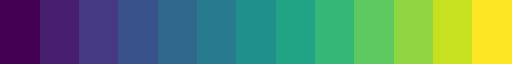

In [333]:
viridis = cm.get_cmap('viridis', 13)
viridis

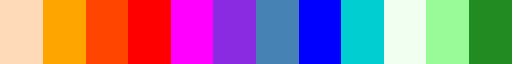

In [398]:
cmap = ListedColormap(colors)
cmap

In [399]:
from matplotlib.patches import Ellipse

No antibiotics orange
Antibiotics magenta


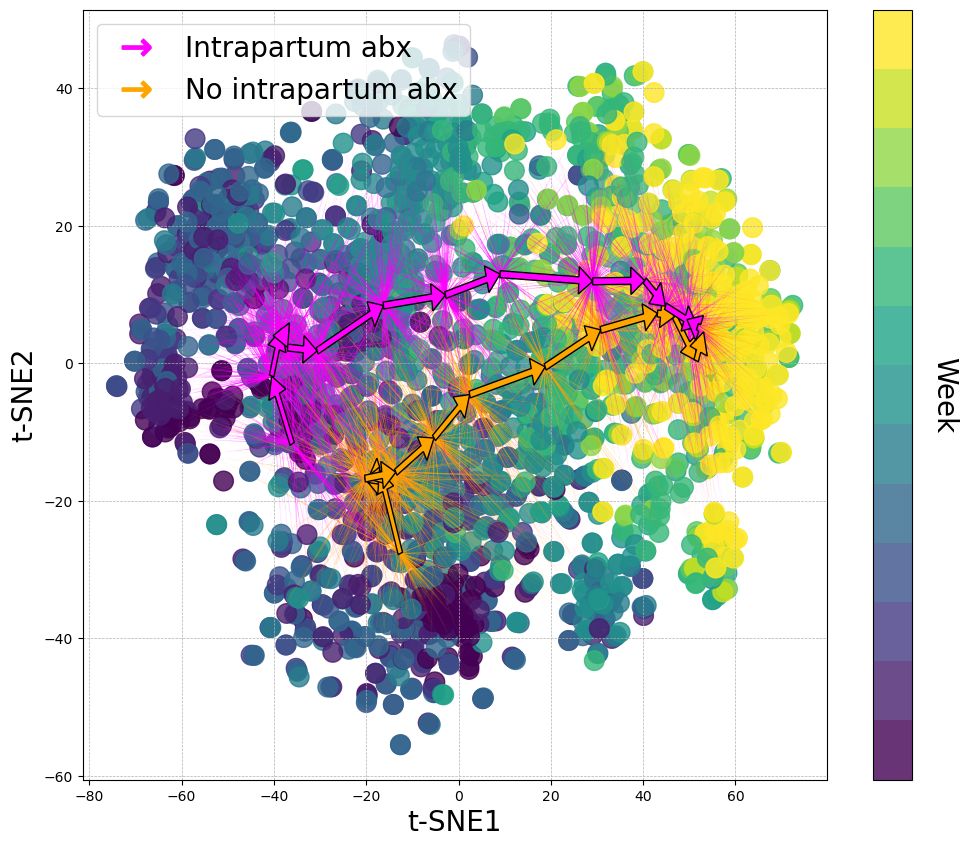

In [450]:
# plt.figure(figsize=(12, 10), dpi=200)
plt.figure(figsize=(12, 10))

arrow_colors = ["orange", "magenta"]

ax = plt.gca()
# edgecolors = metadata["expo_cat1"].apply(lambda x : arrow_colors[0] if x == "No antibiotics" else arrow_colors[1])
# alphas = metadata["expo_cat1"].apply(lambda x : 0.8 if x == "No antibiotics" else 0)
sc = ax.scatter(metadata["PC1"], metadata["PC2"], c=metadata["color_info"], alpha=0.8, s=200, cmap=viridis)

cbar = plt.colorbar(sc, orientation="vertical")#, pad=0.2)
cbar.set_label('Week', rotation=270, fontsize=20, labelpad=30)
cbar.ax.set_yticks([])

ax.grid(linestyle = '--', linewidth = 0.5)
# ax.legend(prop={'size': 15}, loc=1, handlelength=1.4, handleheight=1.4)

ax.set_xlabel("t-SNE1", fontsize=20)
ax.set_ylabel("t-SNE2", fontsize=20)

for i, abx in enumerate(["No antibiotics", "Antibiotics"]):
    print(abx, arrow_colors[i])

    if abx == "No antibiotics":
        data = metadata[metadata["expo_cat1"] == abx]
    else:
        data = metadata[(metadata["expo_cat1"] == "GBS antibiotics") | (
         metadata["expo_cat1"] == "Other antibiotics")]

    last = None
    for info in metadata["color_info"].unique():
        curr_data = data[data["color_info"] == info]
        x = curr_data["PC1"].mean()
        y = curr_data["PC2"].mean()
        
        x_std = curr_data["PC1"].std()
        y_std = curr_data["PC2"].std()
        
        alpha = 1
        
        # draw line from centroid to data point
        for row in range(curr_data.shape[0]):
            start_x = x
            end_x = curr_data["PC1"][row]
            xs = np.linspace(start_x, end_x, 10)
            
            start_y = y
            end_y = curr_data["PC2"][row]
            ys = np.linspace(start_y, end_y, 10)
            
            alphas = np.power(np.linspace(1, 0, 10), 2)
            
            for j in range(1, xs.shape[0]):
                plt.plot(xs[j - 1 : j + 1], ys[j - 1 : j + 1], #linestyle='dotted', 
                         alpha=alphas[j], c=arrow_colors[i], linewidth=0.5, zorder=1)
        
        if last is not None:
            plt.arrow(last[0], last[1], x - last[0], y - last[1], width=1, head_width=4, head_length=3, 
                       length_includes_head=True, facecolor=arrow_colors[i], alpha=alpha, edgecolor="black", zorder=2)
        last = (x, y)
        
#         ax.add_patch(Ellipse(last, x_std, y_std, color=arrow_colors[i], alpha=0.2))
        
        
plt.scatter([], [], c=arrow_colors[1], marker=r'$\rightarrow$',s=20, label='Intrapartum abx')
plt.scatter([], [], c=arrow_colors[0], marker=r'$\rightarrow$',s=20, label='No intrapartum abx')

plt.legend(fontsize=20, markerscale=5, loc=2)

plt.savefig("../output/figures/TSNE.svg")
plt.show()

In [300]:
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix

info = []

for week in metadata["Timeline_Weeks"].unique():
    print(week)
    data = metadata[metadata["Timeline_Weeks"] == week]
    
    samples = transformed.loc[data.index]
    
    dist = DistanceMetric.get_metric('euclidean')
    dissim = dist.pairwise(samples)
    distance = DistanceMatrix(dissim, tuple(samples.index))
    
    groups = data["expo_cat1"].apply(lambda x : "No antibiotics" if x == "No antibiotics" else "Abx")
    
    res = permanova(distance, groups)
    p = res.values[-2]
    info.append({"p" : p, "week" : week})

0
1
2
3
4
12
24
36
48
60
72
84
96


In [301]:
permanova_results = pd.DataFrame(info).set_index("week")
permanova_results

,p
week,
0,0.001
1,0.001
2,0.001
3,0.001
4,0.001
12,0.001
24,0.001
36,0.002
48,0.003
